First 5 rows of the dataset:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

Missing values:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


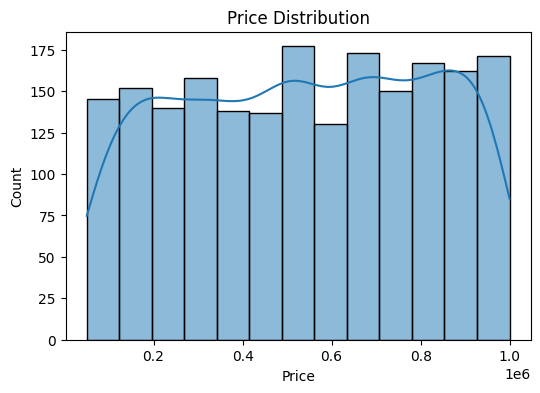

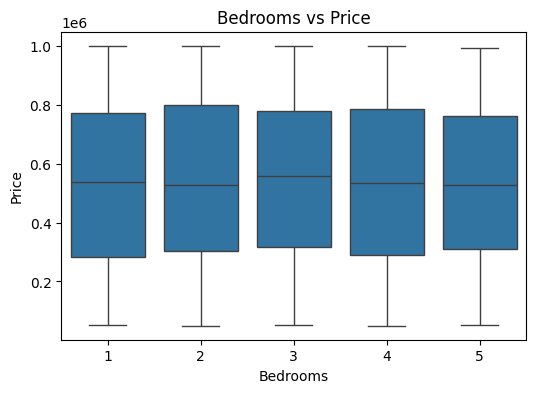

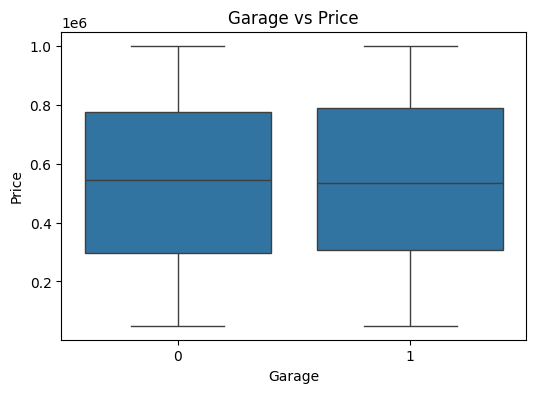

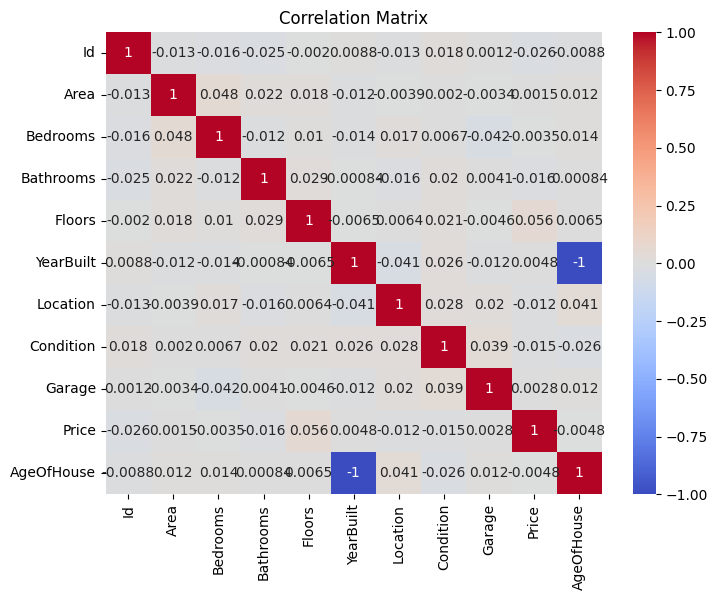


Linear Regression Evaluation:
MAE: 244003.46
RMSE: 280469.74
R² Score: -0.01

Random Forest Evaluation:
MAE: 248463.77
RMSE: 287000.30
R² Score: -0.06

XGBoost Evaluation:
MAE: 265898.59
RMSE: 310301.38
R² Score: -0.24


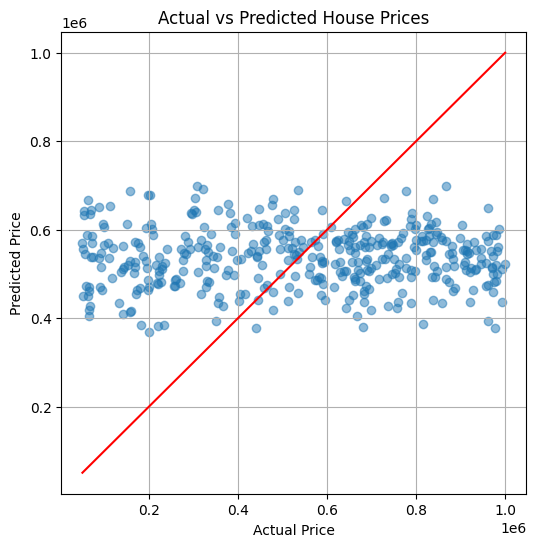

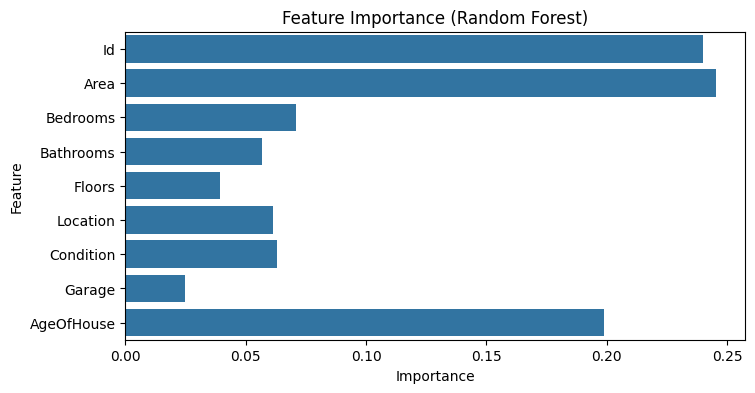

In [13]:
# Forecasting House Price Prediction
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv('House Price Prediction Dataset.csv')
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Data Preprocessing
print("\nMissing values:")
print(df.isnull().sum())

df.dropna(inplace=True)  # Remove rows with missing values

# Encode categorical columns
label_cols = ['Location', 'Garage','Condition']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Create new feature: Age of house
df['AgeOfHouse'] = 2025 - df['YearBuilt']

# Step 4: Exploratory Data Analysis (EDA)
# Histogram for Price
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Boxplot: Bedrooms vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Bedrooms vs Price')
plt.show()

# Boxplot: Garage vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='Garage', y='Price', data=df)
plt.title('Garage vs Price')
plt.show()

# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Feature Engineering
df['PricePerSqft'] = df['Price'] / df['Area']  # Optional feature
df.drop(['PricePerSqft', 'YearBuilt'], axis=1, inplace=True)  # Remove unused

# Step 6: Model Building & Evaluation
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R² Score: {r2_score(y_test, preds):.2f}")

# Step 7: Visualization of Results
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

# Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# Feature Importance
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
